In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load, dump
import seaborn as sns
from molmap.feature.fingerprint import colormaps,colors
sns.set(style = 'white', font_scale = 2)

RDKit WARNING: [11:10:49] Enabling RDKit 2019.09.2 jupyter extensions


In [3]:
colors = sns.color_palette(palette = 'rainbow',n_colors=12)

In [4]:
df = pd.read_csv('./knn_regression.csv' ,index_col = 0)
res0 = df.groupby(['fp_type', 'task_name'])['test_r2'].apply(np.mean).unstack()
res0 = res0[['FreeSolv', 'ESOL',  'Lipop']]

df1 = pd.read_csv('./knn_classification.csv' ,index_col = 0)
res1 = df1.groupby(['fp_type', 'task_name'])['test_roc_auc'].apply(np.mean).unstack()


res = res0.join(res1)
idx = res.max(axis=1).sort_values(ascending = False).index
res = res.loc[idx]

In [5]:
res.columns

Index(['FreeSolv', 'ESOL', 'Lipop', 'BACE', 'BBBP', 'ClinTox', 'HIV', 'SIDER'], dtype='object', name='task_name')

In [6]:
res.index.name = 'Fingerprints'
res.columns.name = 'Tasks'

d = {'PubChemFP': 'PubChemFP (881)',
 'MACCSFP': 'MACCSFP (167)',
 'AvalonFP': 'AvalonFP (2048)',
 'AtomPairFP': 'AtomPairFP (2048)',
 'PharmacoErGFP': 'PharmacoErGFP (441)',
 'RDkitFP': 'RDkitFP (2048)',
 'PharmacoPFP': 'PharmacoPFP (300)',
 'EstateFP': 'EstateFP (79)',
 'MorganFP': 'MorganFP (2048, r=2)',
 'TorsionFP': 'TorsionFP(2048)',
 'MAP4': 'MAP4 (2048, r=2)',
 'MHFP6': 'MHFP6 (2048, r=3)'}

res.index = res.index.map(d)

/home/shenwanxiang/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


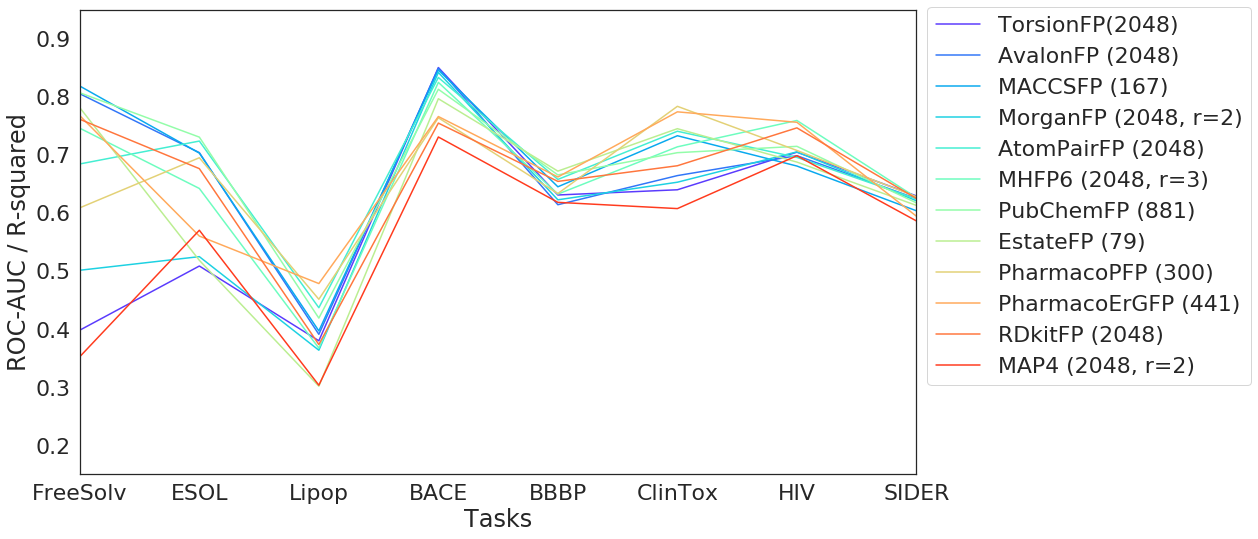

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1,  figsize=(18,8))

res.T.plot(ax = ax, colors = colors) # [colormaps[i] for i in res.index]
ax.legend(bbox_to_anchor=(1.00, 1.03))
plt.xticks(range(len(res.T.index)), res.T.index,  rotation=0)
ax.set_ylabel('ROC-AUC / R-squared')
ax.set_ylim(0.15, 0.95)
fig.tight_layout()
fig.savefig('./html/fp_performances_knn.svg', bbox_inches='tight', dpi=300)

In [8]:
 df.groupby(['fp_type', 'task_name'])['test_rmse'].apply(np.mean).unstack()

task_name,ESOL,FreeSolv,Lipop
fp_type,,,
AtomPairFP,1.065765,2.356793,0.909688
AvalonFP,1.113316,1.802472,0.940643
EstateFP,1.419071,1.855818,1.008584
MACCSFP,1.106942,1.700444,0.928996
MAP4,1.523362,3.617101,1.043107
MHFP6,1.227509,2.066430,0.950413
MorganFP,1.409471,2.955425,0.958671
PharmacoErGFP,1.338916,1.918620,0.865660
PharmacoPFP,1.122586,2.461215,0.888676


In [9]:
 df1.groupby(['fp_type', 'task_name'])['test_roc_auc'].apply(np.mean).unstack()

task_name,BACE,BBBP,ClinTox,HIV,SIDER
fp_type,,,,,
AtomPairFP,0.833243,0.657722,0.740678,0.695667,0.624285
AvalonFP,0.849457,0.614173,0.664326,0.698641,0.624734
EstateFP,0.796649,0.672030,0.745102,0.687594,0.612964
MACCSFP,0.846196,0.645053,0.732980,0.680781,0.603737
MAP4,0.730797,0.618268,0.607512,0.698515,0.586263
MHFP6,0.824819,0.632479,0.713858,0.759222,0.626298
MorganFP,0.841938,0.622652,0.652936,0.705185,0.621006
PharmacoErGFP,0.766033,0.661913,0.774105,0.756114,0.594410
PharmacoPFP,0.763859,0.633443,0.783614,0.707640,0.628017


In [12]:
res.to_pickle('./knn.pkl')